In [3]:
#lib for extraction ,manipulation,analysis
import numpy as np
import pandas as pd
# for visualtion
import matplotlib.pyplot as plt
import seaborn as sns
# for stats
import scipy.stats 
from scipy.stats import shapiro, chi2, normaltest, kstest, zscore
# for vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# train test split
from sklearn.model_selection import train_test_split

In [4]:
# importing dataset 
data=pd.read_csv(r"C:\Users\deshm\OneDrive\Desktop\ML\02-EDA\A2Q3 customers.csv")
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [5]:
#EDA for each data analysis 
def eda(data):
    print("Shape:",data.shape)
    print("- "*50)
    print("Size:",data.size)
    print("- "*50)
    print("INFO:",data.info)
    print("- "*50)
    print("Describe:",data.describe())
    print("- "*50)
    print("Dtype:",data.dtypes)
    print("* "*50)
    print("Checking Null Values:",data.isnull().sum())

eda(data)

Shape: (440, 8)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Size: 3520
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
INFO: <bound method DataFrame.info of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438

In [6]:
# Analysis for Numerical Columns
def Num_col(data, col):
    mean=data[col].mean()
    median=data[col].median()
    mode=data[col].mode()[0]
    var =data[col].var()
    std=data[col].std()
    skew=data[col].skew()
    Min=data[col].min()
    Max=data[col].max()
    Range=Max-Min
    print("Numerical Columns Analysis:")
    print(f"mean:{mean}\nmedian:{median}\nmode:{mode}\nvar:{var}\nstd:{std}\nskew:{skew}\nMIN:{Min}\nMAAX:{Max}\nRange:{Range}")


In [7]:
 Num_col(data,"Channel")

Numerical Columns Analysis:
mean:1.3227272727272728
median:1.0
mode:1
var:0.2190722716918627
std:0.46805156947911486
skew:0.760951157493207
MIN:1
MAAX:2
Range:1


In [8]:
Num_col(data,"Region")

Numerical Columns Analysis:
mean:2.543181818181818
median:3.0
mode:3
var:0.5994978256367766
std:0.7742724492300992
skew:-1.283626930042069
MIN:1
MAAX:3
Range:2


In [9]:
Num_col(data,"Fresh")

Numerical Columns Analysis:
mean:12000.297727272728
median:8504.0
mode:3
var:159954927.4214072
std:12647.328865076894
skew:2.561322751927935
MIN:3
MAAX:112151
Range:112148


In [10]:
Num_col(data,"Milk")

Numerical Columns Analysis:
mean:5796.265909090909
median:3627.0
mode:577
var:54469967.23892629
std:7380.377174570843
skew:4.053754849210881
MIN:55
MAAX:73498
Range:73443


In [11]:
Num_col(data,"Grocery")

Numerical Columns Analysis:
mean:7951.277272727273
median:4755.5
mode:683
var:90310103.75437982
std:9503.162828994346
skew:3.5874286903915453
MIN:3
MAAX:92780
Range:92777


In [12]:
Num_col(data,"Frozen")

Numerical Columns Analysis:
mean:3071.931818181818
median:1526.0
mode:133
var:23567853.166183475
std:4854.673332592367
skew:5.9079856924559575
MIN:25
MAAX:60869
Range:60844


In [13]:
Num_col(data,"Detergents_Paper")

Numerical Columns Analysis:
mean:2881.4931818181817
median:816.5
mode:3
var:22732436.036399864
std:4767.8544479042
skew:3.6318506306913645
MIN:3
MAAX:40827
Range:40824


In [26]:
Num_col(data,"Delicatessen")

Numerical Columns Analysis:
mean:1524.8704545454545
median:965.5
mode:3
var:7952997.497986128
std:2820.1059373693975
skew:11.151586478906117
MIN:3
MAAX:47943
Range:47940


In [30]:
def Checking_and_Handling_Of_Outliers(data, col):
    sns.boxplot(data[col], color = "Red")
    plt.title(f"Boxplot for {col}")
    plt.show()
        
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)

    iqr = q3 - q1

    LowerTail = q1 - 1.5*iqr
    UpperTail = q3 + 1.5*iqr

    print(f"25% Quantile q1 = {q1}\n75% Quantile q3 = {q3}\nIQR = {iqr}\n")
    print("-"*80)
    print(f"Lower Tail = {LowerTail}\nUpper Tail = {UpperTail}")
    print("-"*80)

    # Checking for Outliers
    Outliers = data[(data[col] < LowerTail) | (data[col] > UpperTail)]
    print("\nOutliers :\n",Outliers)
    print("-"*80)

    #HAndling of Outliers :
    data.loc[data[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value
    data.loc[data[col] > UpperTail, col] = UpperTail # all outliers greater than uppertail, assigned by uppertail value
    print("After handling of Outliers data:\n")
    print(data.head())

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicatessen      440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


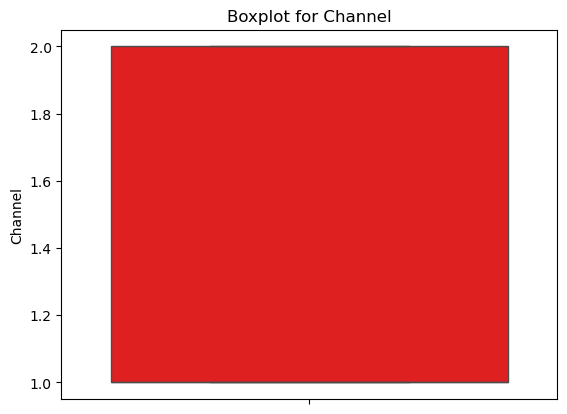

25% Quantile q1 = 1.0
75% Quantile q3 = 2.0
IQR = 1.0

--------------------------------------------------------------------------------
Lower Tail = -0.5
Upper Tail = 3.5
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicatessen]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0      2.0       3  12669  9656     7561     214              2674   
1      2.0       3   7057  9810     9568    1762              3293   
2      2.0       3   6353  8808     7684    2405              3516   
3      1.0       3  13265  1196     4221    6404               507   
4      2.0       3  22615  5410     7198    3915              1777   

   Delicatessen  
0          1338  
1          1776  
2          7844  
3          1

C:\Users\deshm\AppData\Local\Temp\ipykernel_3780\4129211344.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value


In [34]:
Checking_and_Handling_Of_Outliers(data, "Channel")

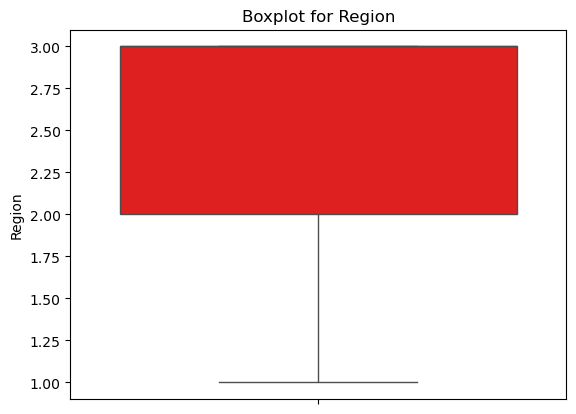

25% Quantile q1 = 2.0
75% Quantile q3 = 3.0
IQR = 1.0

--------------------------------------------------------------------------------
Lower Tail = 0.5
Upper Tail = 4.5
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicatessen]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0      2.0     3.0  12669  9656     7561     214              2674   
1      2.0     3.0   7057  9810     9568    1762              3293   
2      2.0     3.0   6353  8808     7684    2405              3516   
3      1.0     3.0  13265  1196     4221    6404               507   
4      2.0     3.0  22615  5410     7198    3915              1777   

   Delicatessen  
0          1338  
1          1776  
2          7844  
3          17

C:\Users\deshm\AppData\Local\Temp\ipykernel_3780\4129211344.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value


In [36]:
Checking_and_Handling_Of_Outliers(data, "Region")

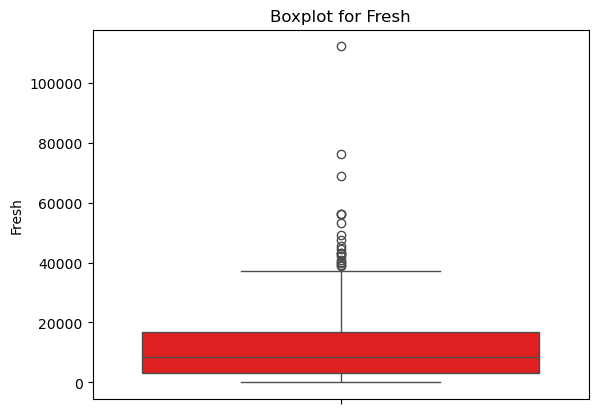

25% Quantile q1 = 3127.75
75% Quantile q3 = 16933.75
IQR = 13806.0

--------------------------------------------------------------------------------
Lower Tail = -17581.25
Upper Tail = 37642.75
--------------------------------------------------------------------------------

Outliers :
      Channel  Region   Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
29       1.0     3.0   43088   2100     2609    1200              1107   
39       1.0     3.0   56159    555      902   10002               212   
47       2.0     3.0   44466  54259    55571    7782             24171   
52       2.0     3.0   40721   3916     5876     532              2587   
87       1.0     3.0   43265   5025     8117    6312              1579   
103      1.0     3.0   56082   3504     8906   18028              1480   
125      1.0     3.0   76237   3473     7102   16538               778   
129      1.0     3.0   42312    926     1510    1718               410   
176      1.0     3.0   45640   6958     6536  

C:\Users\deshm\AppData\Local\Temp\ipykernel_3780\4129211344.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-17581.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value


In [38]:
Checking_and_Handling_Of_Outliers(data, "Fresh")

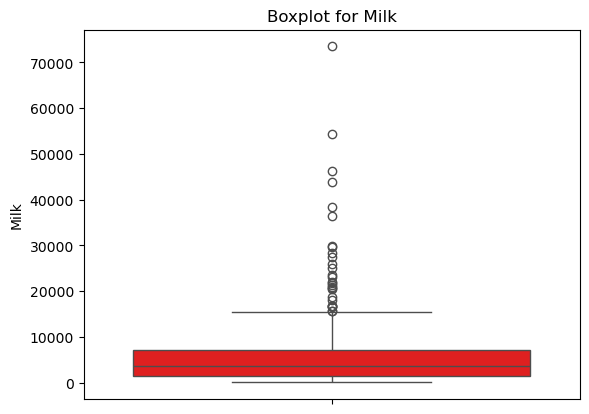

25% Quantile q1 = 1533.0
75% Quantile q3 = 7190.25
IQR = 5657.25

--------------------------------------------------------------------------------
Lower Tail = -6952.875
Upper Tail = 15676.125
--------------------------------------------------------------------------------

Outliers :
      Channel  Region     Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
23       2.0     3.0  26373.00  36423    22019    5154              4337   
28       2.0     3.0   4113.00  20484    25957    1158              8604   
38       2.0     3.0   4591.00  15729    16709      33              6956   
45       2.0     3.0   5181.00  22044    21531    1740              7353   
47       2.0     3.0  37642.75  54259    55571    7782             24171   
49       2.0     3.0   4967.00  21412    28921    1798             13583   
56       2.0     3.0   4098.00  29892    26866    2616             17740   
61       2.0     3.0  35942.00  38369    59598    3254             26701   
65       2.0     3.0     85.0

C:\Users\deshm\AppData\Local\Temp\ipykernel_3780\4129211344.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6952.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value


In [40]:
Checking_and_Handling_Of_Outliers(data, "Milk")

In [42]:
# Bivariate analysis of columns
def bivariate_violin_plot(data, categorical_col, numerical_col):
    plt.figure(figsize=(12, 6))
    sns.violinplot(x=categorical_col, y=numerical_col, data=data, palette="muted", inner="quartile")
    plt.title(f'Violin Plot: {numerical_col} by {categorical_col}', fontsize=16)
    plt.xlabel(categorical_col, fontsize=12)
    plt.ylabel(numerical_col, fontsize=12)
    plt.show()

C:\Users\deshm\AppData\Local\Temp\ipykernel_3780\3825122554.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=categorical_col, y=numerical_col, data=data, palette="muted", inner="quartile")


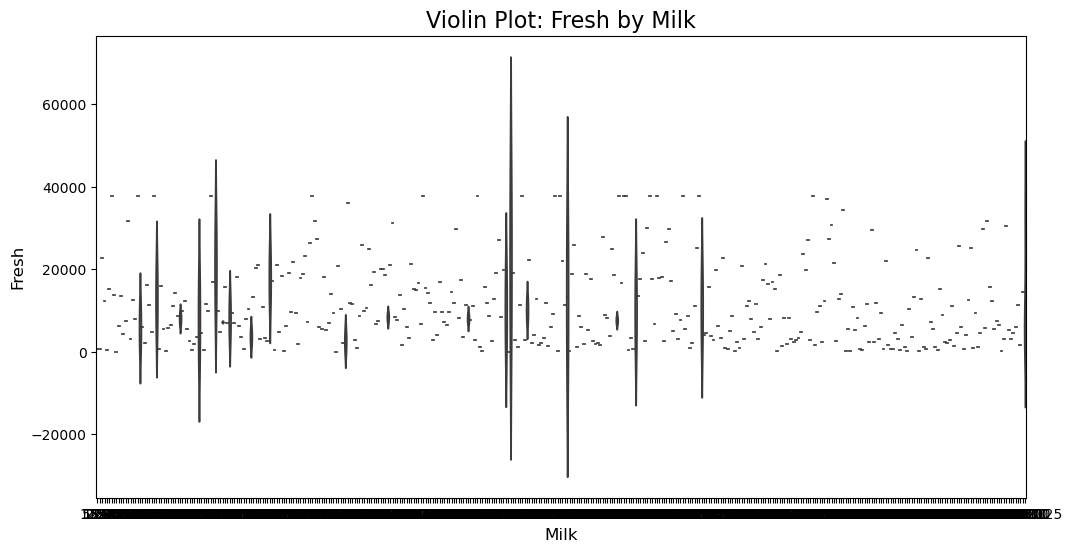

In [44]:
bivariate_violin_plot(data,"Milk" ,"Fresh")